In [1]:
# Installing libraries

import time
import random
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal
from scipy.optimize import curve_fit

In [71]:
# The constant function

def f_const(v):
    avg_times=[] # list of average times
    for i in range(15): # I increased the number of repeats to reduce emissions
        start_time=time.perf_counter_ns()
        result=1 if len(v)>0 else None
        stop_time=time.perf_counter_ns()
        all_time=stop_time-start_time
        avg_times.append(all_time)
    avg_time=np.mean(avg_times) # the average value of the execution time for all repetitions
    return avg_time  

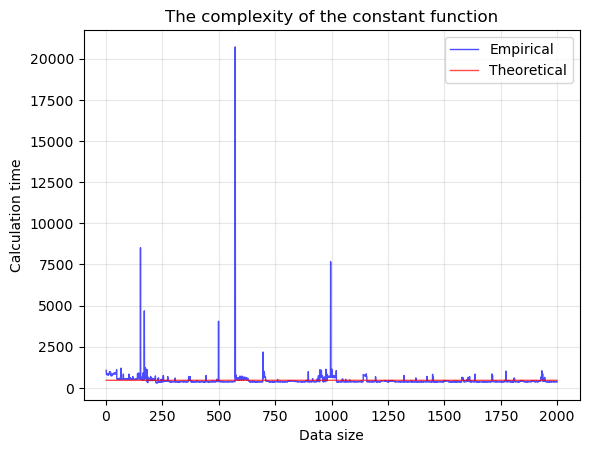

In [73]:
# Measuring the complexity of a constant function algorithm 

n_values=list(range(1,2001))
avg_times_const=[] # list of average times for constant function
random.seed(42)
for n in n_values:
    v=[random.randint(0,2001) for _ in range(n)]
    avg_time_const=f_const(v)
    avg_times_const.append(avg_time_const)

# correct format for curve function
x = np.array(n_values)
y_const = np.array(avg_times_const)

# function for O(1)
def f_1(x,c): 
    return c
params, _ = curve_fit(f_1, x, y_const) # getting parameters
c = params[0]

plt.plot(n_values, avg_times_const,'b-', linewidth=1, alpha=0.7, label='Empirical')
plt.plot(n_values,  [c] * len(n_values),'r-', linewidth=1, alpha=0.7, label='Theoretical') 
plt.legend()
plt.xlabel('Data size')
plt.ylabel('Calculation time')
plt.title('The complexity of the constant function')
plt.grid(True,alpha=0.3)
plt.show()

In [7]:
# The sum of elements

def elem_sum(v):
    avg_times=[]
    for k in range(10): # I increased the number of repeats to reduce emissions
        start_time=time.perf_counter_ns()
        total=0.0
        for i in v:
            total+=i
        stop_time=time.perf_counter_ns()
        all_time=stop_time-start_time
        avg_times.append(all_time)
    avg_time=np.mean(avg_times)
    return avg_time   

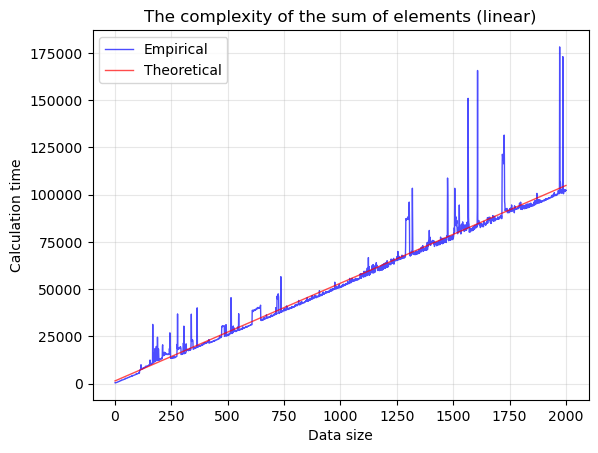

In [9]:
# Measuring the complexity of a sum function algorithm 

avg_times_sum=[] # array of average times for sum function
for n in n_values:
    v=[random.randint(0,2001) for _ in range(n)]
    avg_time_sum=elem_sum(v)
    avg_times_sum.append(avg_time_sum)

y_sum = np.array(avg_times_sum)

# function for O(n)
def f_n(x,a,b):
    return a*x+b
params, _ = curve_fit(f_n, x, y_sum)
a,b = params

plt.plot(n_values, avg_times_sum,'b-', linewidth=1, alpha=0.7, label='Empirical')
plt.plot(n_values,  f_n(x, a,b),'r-', linewidth=1, alpha=0.7, label='Theoretical') 
plt.legend()
plt.xlabel('Data size')
plt.ylabel('Calculation time')
plt.title('The complexity of the sum of elements (linear)')
plt.grid(True,alpha=0.3)
plt.show()

In [11]:
# The product of elements

def elem_product(v):
    avg_times=[]
    for k in range(10):
        start_time=time.perf_counter()
        total=1.0
        for i in v:
            total*=i
        stop_time=time.perf_counter()
        all_time=stop_time-start_time
        avg_times.append(all_time)
    avg_time=np.mean(avg_times)
    return avg_time   

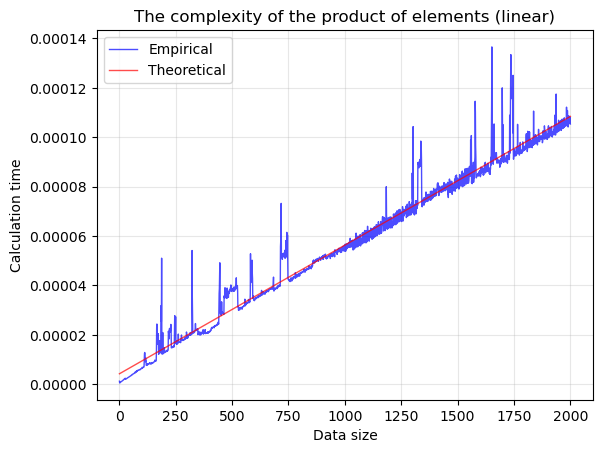

In [13]:
# Measuring the complexity of a product function algorithm 

avg_times_product=[] # array of average times for product function
for n in n_values:
    v=[random.randint(0,2001) for _ in range(n)]
    avg_time_product=elem_product(v)
    avg_times_product.append(avg_time_product)

y_product = np.array(avg_times_product)

# also function for O(n) is used
params_p, _ = curve_fit(f_n, x, y_product)
a_p,b_p = params_p

plt.plot(n_values, avg_times_product,'b-', linewidth=1, alpha=0.7, label='Empirical')
plt.plot(n_values,  f_n(x, a_p,b_p),'r-', linewidth=1, alpha=0.7, label='Theoretical') 
plt.legend()
plt.xlabel('Data size')
plt.ylabel('Calculation time')
plt.title('The complexity of the product of elements (linear)')
plt.grid(True,alpha=0.3)
plt.show()

In [15]:
# The direct calculation of polinom

def polinom(v,x):
    avg_times=[]
    for k in range(5):
        start_time=time.perf_counter()
        total=0.0
        for i in range(len(v)):
            power=x**(i-1)
            total+=v[i]*power
        stop_time=time.perf_counter()
        all_time=stop_time-start_time
        avg_times.append(all_time)
    avg_time=np.mean(avg_times)
    return avg_time

In [17]:
# Another way of direct polinomial, but there is Decimal function for larger power 

def polinom_0(v,x):
    avg_times=[]
    x_dec=Decimal(str(x))
    v_dec = [Decimal(str(coef)) for coef in v]
    for k in range(5):
        start_time=time.perf_counter()
        total=Decimal('0.0')
        for i in range(len(v)):
            power=x_dec**Decimal(i-1)
            total+=v_dec[i]*power
        stop_time=time.perf_counter()
        all_time=stop_time-start_time
        avg_times.append(all_time)
    avg_time=np.mean(avg_times)
    return avg_time

In [19]:
# Horner's method

def horner(v,x):
    avg_times=[]
    for k in range(5):
        start_time=time.perf_counter()
        total=0.0
        for i in range(len(v)-1,-1,-1):
            total=total*x+v[i]
        stop_time=time.perf_counter()
        all_time=stop_time-start_time
        avg_times.append(all_time)
    avg_time=np.mean(avg_times)
    return avg_time

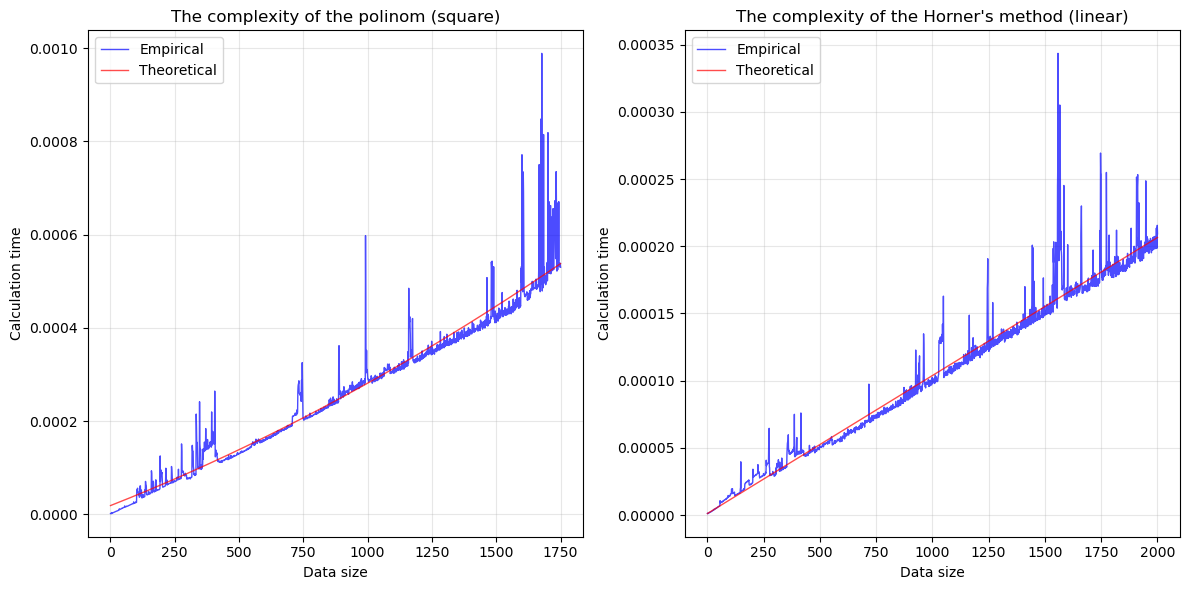

In [23]:
# Measuring the complexity of a polinomial function algorithm 
# Firstly, I used classical direct method, but the power was large, so I reduce the number of elements

avg_times_polinom=[]
n_values_1=list(range(1,1751))
for n in n_values_1:
    v=[random.randint(0,2001) for _ in range(n)]
    avg_time_polinom=polinom(v,x=1.5)
    avg_times_polinom.append(avg_time_polinom)

x_1 = np.array(n_values_1)
y_polinom = np.array(avg_times_polinom)

# function for O(n^2)
def f_n2(x,a,b,c):
    return a*x**2+b*x+c
params, _ = curve_fit(f_n2, x_1, y_polinom)
a,b,c = params

# Mesuaring the complexity of Horner's algorithm 
# Here there were no mistackes with vector size

avg_times_horner=[]
for n in n_values:
    v=[random.randint(0,2001) for _ in range(n)]
    avg_time_horner=horner(v,x=1.5)
    avg_times_horner.append(avg_time_horner)

y_horner = np.array(avg_times_horner)

params_h, _ = curve_fit(f_n, x, y_horner)
a_h,b_h = params_h

# There is a subplot to compare two methods of calculating a polynomial

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: direct method
ax1.plot(n_values_1, avg_times_polinom, 'b-', linewidth=1, alpha=0.7, label='Empirical')
ax1.plot(n_values_1, f_n2(x_1, a, b, c), 'r-', linewidth=1, alpha=0.7, label='Theoretical') 
ax1.legend()
ax1.set_xlabel('Data size')
ax1.set_ylabel('Calculation time')
ax1.set_title('The complexity of the polinom (square)')
ax1.grid(True, alpha=0.3)

# Second subplot: Horner's method
ax2.plot(n_values, avg_times_horner, 'b-', linewidth=1, alpha=0.7, label='Empirical')
ax2.plot(n_values, f_n(x, a_h, b_h), 'r-', linewidth=1, alpha=0.7, label='Theoretical') 
ax2.legend()
ax2.set_xlabel('Data size')
ax2.set_ylabel('Calculation time')
ax2.set_title('The complexity of the Horner\'s method (linear)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

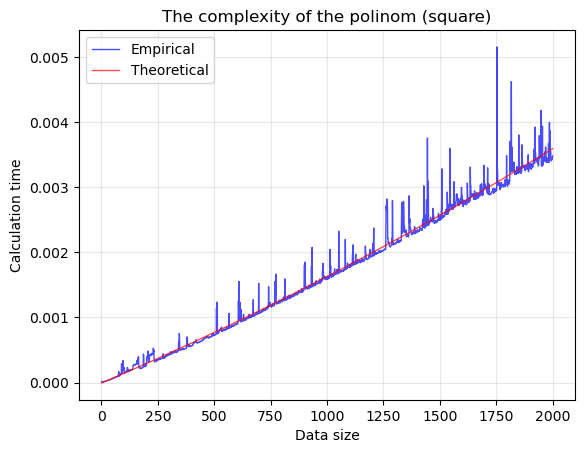

In [25]:
# Measuring the complexity of a polinomial function algorithm but with the Decimal function

avg_times_polinom_0=[]

for n in n_values:
    v=[random.randint(0,2001) for _ in range(n)]
    avg_time_polinom_0=polinom_0(v,x=1.5)
    avg_times_polinom_0.append(avg_time_polinom_0)

# also function for O(n^2) is used
y_polinom_0 = np.array(avg_times_polinom_0)
params, _ = curve_fit(f_n2, x, y_polinom_0)
a,b,c = params

plt.plot(n_values, avg_times_polinom_0,'b-', linewidth=1, alpha=0.7, label='Empirical')
plt.plot(n_values,  f_n2(x, a,b,c),'r-', linewidth=1, alpha=0.7, label='Theoretical') 
plt.legend()
plt.xlabel('Data size')
plt.ylabel('Calculation time')
plt.title('The complexity of the polinom (square)')
plt.grid(True,alpha=0.3)
plt.show()

In [27]:
# Bubble sort function

def bubble_sort(v):
    sorted_v=v.copy()
    for i in range(len(sorted_v)-1):
            flag=False
            for j in range(len(sorted_v)-1-i):
                if sorted_v[j]>sorted_v[j+1]:
                    sorted_v[j],sorted_v[j+1]=sorted_v[j+1],sorted_v[j]
                    flag=True
            if not flag:
                break
    return sorted_v

In [29]:
# Repeated calculations of the sorting time

def f_bubble_sort(v):
    avg_times=[]
    for k in range(5):
        start_time=time.perf_counter()
        sorted_v=bubble_sort(v)
        stop_time=time.perf_counter()
        all_time=stop_time-start_time
        avg_times.append(all_time)
    avg_time=np.mean(avg_times)
    return avg_time

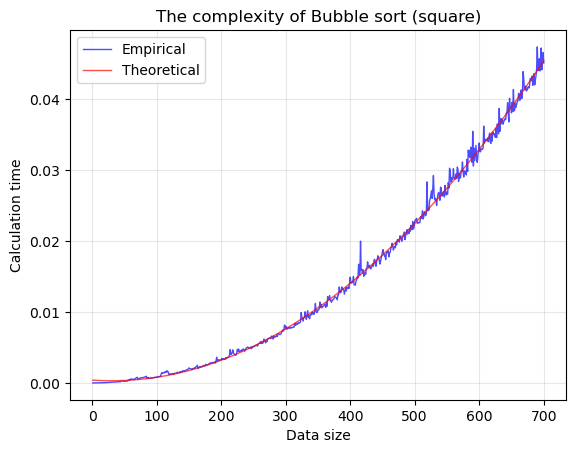

In [31]:
# Measuring the complexity of Bubble sort algorithm 
# I reduce the number of elements to make the algorithm run faster

avg_times_bubble=[]
n_values_1=list(range(1,701)) 
for n in n_values_1:
    v=[random.randint(0,2001) for _ in range(n)]
    avg_time_bubble=f_bubble_sort(v)
    avg_times_bubble.append(avg_time_bubble)


x_1 = np.array(n_values_1)
y_bubble = np.array(avg_times_bubble)

# also function for O(n^2) is used
params_b, _ = curve_fit(f_n2, x_1, y_bubble)
a_b,b_b,c_b = params_b

plt.plot(n_values_1, avg_times_bubble,'b-', linewidth=1, alpha=0.7, label='Empirical')
plt.plot(n_values_1,  f_n2(x_1, a_b,b_b,c_b),'r-', linewidth=1, alpha=0.7, label='Theoretical') 
plt.legend()
plt.xlabel('Data size')
plt.ylabel('Calculation time')
plt.title('The complexity of Bubble sort (square)')
plt.grid(True,alpha=0.3)
plt.show()

In [33]:
# Quick sort function

def quick_sort(v):
    if len(v)<=1:
        return v
    c=v[len(v)//2]
    left=[x for x in v if x<c]
    middle=[x for x in v if x==c]
    right=[x for x in v if x>c]
    return quick_sort(left)+middle+quick_sort(right)

In [35]:
# Repeated calculations of the sorting time

def f_quick_sort(v):
    avg_times=[]
    for i in range(5):
        start_time=time.perf_counter()
        sortet_v=quick_sort(v)
        stop_time=time.perf_counter()
        all_time=stop_time-start_time
        avg_times.append(all_time)
    avg_time=np.mean(avg_times)
    return avg_time  

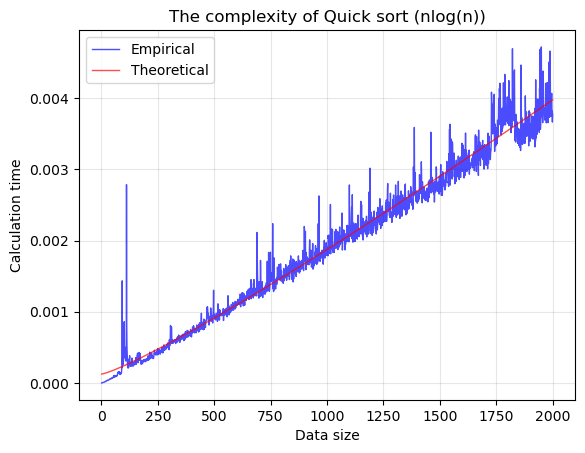

In [37]:
# Measuring the complexity of Quick sort algorithm 

avg_times_quick=[]
for n in n_values:
    v=[random.randint(0,2001) for _ in range(n)]
    avg_time_quick=f_quick_sort(v)
    avg_times_quick.append(avg_time_quick)

y_quick = np.array(avg_times_quick)

# function for O(n*log(n))
def f_n_logn(x,a,b):
    return a*x*np.log(x)+b
params_q, _ = curve_fit(f_n_logn, x, y_quick)
a_q,b_q = params_q

plt.plot(n_values, avg_times_quick,'b-', linewidth=1, alpha=0.7, label='Empirical')
plt.plot(n_values,  f_n_logn(x, a_q,b_q),'r-', linewidth=1, alpha=0.7, label='Theoretical') 
plt.legend()
plt.xlabel('Data size')
plt.ylabel('Calculation time')
plt.title('The complexity of Quick sort (nlog(n))')
plt.grid(True,alpha=0.3)
plt.show()

In [39]:
# Timsort function

def timsort(v):
    if len(v)<=1:
        return v
    min_run=64
    n=len(v)
    runs=[]
    start=0
    while start<n:
        end=find_run(v,start,min_run)
        insertion_sort(v,start,end)
        runs.append((start,end))
        start=end+1
    while len(runs)>1:
        new_runs=[]
        for i in range(0,len(runs),2):
            if i+1<len(runs):
                merge_runs(v,runs[i][0], runs[i][1], runs[i+1][1])
                new_runs.append((runs[i][0], runs[i+1][1]))
            else:
                new_runs.append(runs[i])
        runs=new_runs
        return v

def find_run(v, start, min_run):
    n=len(v)
    if start>=n-1:
        return n-1
    if v[start] <= v[start + 1]:
        end = start
        while end < n - 1 and v[end] <= v[end + 1]:
            end += 1
    else:
        end = start
        while end < n - 1 and v[end] > v[end + 1]:
            end += 1
        reverse_slice(v, start, end)
    required_length = min(min_run, n - start) - 1
    if end - start < required_length:
        end = start + required_length
        if end >= n:
            end = n - 1
    return end

def insertion_sort(v, start, end):
    for i in range(start + 1, end + 1):
        key = v[i]
        j = i - 1
        while j >= start and v[j] > key:
            v[j + 1] = v[j]
            j -= 1
        v[j + 1] = key

def merge_runs(v, start, mid, end):
    left = v[start:mid + 1]
    right = v[mid + 1:end + 1]
    i = j = 0
    k = start
    
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            v[k] = left[i]
            i += 1
        else:
            v[k] = right[j]
            j += 1
        k += 1
    while i < len(left):
        v[k] = left[i]
        i += 1
        k += 1
    while j < len(right):
        v[k] = right[j]
        j += 1
        k += 1

def reverse_slice(v, start, end):
    while start < end:
        v[start], v[end] = v[end], v[start]
        start += 1
        end -= 1

In [41]:
# Repeated calculations of the sorting time

def f_timsort(v):
    avg_times=[]
    for i in range(5):
        start_time=time.perf_counter()
        sortet_v=timsort(v)
        stop_time=time.perf_counter()
        all_time=stop_time-start_time
        avg_times.append(all_time)
    avg_time=np.mean(avg_times)
    return avg_time  

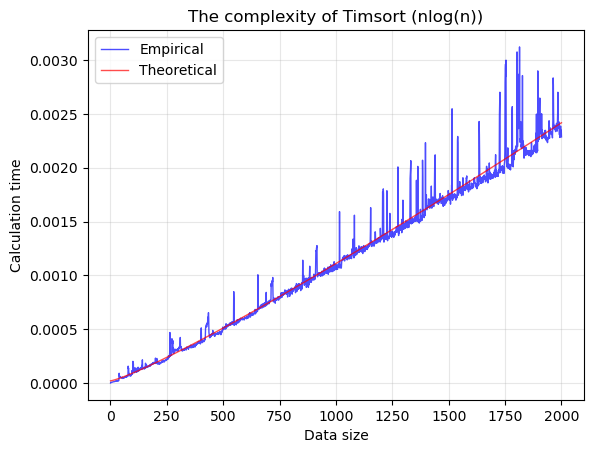

In [43]:
# Measuring the complexity of Timsort algorithm 

avg_times_timsort=[]
for n in n_values:
    v=[random.randint(0,2001) for _ in range(n)]
    avg_time_timsort=f_timsort(v)
    avg_times_timsort.append(avg_time_timsort)

# also function for O(n*log(n)) is used
y_timsort = np.array(avg_times_timsort)
params_t, _ = curve_fit(f_n_logn, x, y_timsort)
a_t,b_t = params_t

plt.plot(n_values, avg_times_timsort,'b-', linewidth=1, alpha=0.7, label='Empirical')
plt.plot(n_values,  f_n_logn(x, a_t,b_t),'r-', linewidth=1, alpha=0.7, label='Theoretical') 
plt.legend()
plt.xlabel('Data size')
plt.ylabel('Calculation time')
plt.title('The complexity of Timsort (nlog(n))')
plt.grid(True,alpha=0.3)
plt.show()

In [45]:
# Matrix product function

def matrix_product(A,B):
    n = len(A)
    C = [[0 for _ in range(n)] for _ in range(n)]
    
    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i][j]+=A[i][k]*B[k][j]
    return C

# Repeated calculations of the matrix product
def f_matrix_product(A,B):
    avg_times=[]
    for i in range(5):
        start_time=time.perf_counter()
        C=matrix_product(A,B)
        stop_time=time.perf_counter()
        all_time=stop_time-start_time
        avg_times.append(all_time)
    avg_time=np.mean(avg_times)
    return avg_time  

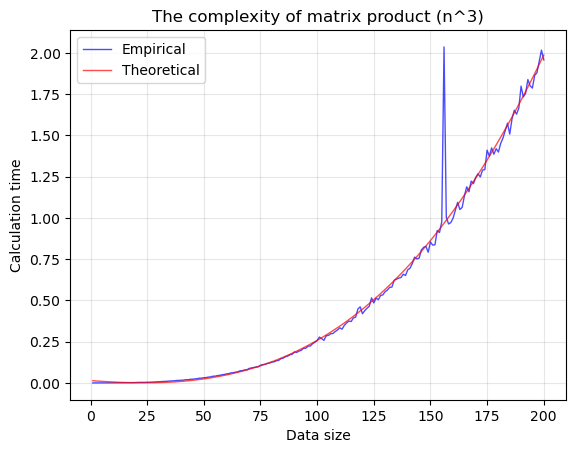

In [65]:
# Measuring the complexity of matrix product
# I reduce the number of elements to make the algorithm run faster

avg_times_matrix=[]
n_values_1=list(range(1,201)) 
for n in n_values_1:
    A = [[random.randint(1, 2001) for _ in range(n)] for _ in range(n)]
    B = [[random.randint(1, 2001) for _ in range(n)] for _ in range(n)]
    avg_time_matrix=f_matrix_product(A,B)
    avg_times_matrix.append(avg_time_matrix)

# function for O(n^3) 
def f_n3(x,a,b,c,d):
    return a*x**3+b*x**2+c*x+d

x_1 = np.array(n_values_1)
y_matrix = np.array(avg_times_matrix)
params_m, _ = curve_fit(f_n3, x_1, y_matrix)
a_m,b_m,c_m,d_m = params_m

plt.plot(n_values_1, avg_times_matrix,'b-', linewidth=1, alpha=0.7, label='Empirical')
plt.plot(n_values_1,  f_n3(x_1, a_m,b_m,c_m,d_m),'r-', linewidth=1, alpha=0.7, label='Theoretical') 
plt.legend()
plt.xlabel('Data size')
plt.ylabel('Calculation time')
plt.title('The complexity of matrix product (n^3)')
plt.grid(True,alpha=0.3)
plt.show()

### Data structures such as lists were used in these algorithms. 
* The methods of the __O(1)__ algorithm include obtaining an element by index and the absence of recursion is characteristic.
* The design methods of the __O(n)__ algorithm include iteration and sequential accumulation of the result in a variable.
* The design methods of the __O(n^2)__ algorithm include pairwise comparison and sorting in several passes, which increases the calculation time.
* The methods of designing the __O(nlog(n))__ algorithm, namely _Quick sort_, include the divide and conquer method, the choice of a reference element and a recursive subarray call. Algorithm _Timsort_ also uses partitioning into subarrays, sorting them, and then merging them.
* The design methods of algorithm __O(n^3)__, more precisely _Matrix Product_, include three nested loops for correct access to matrix elements, and an accumulator variable for accumulating a scalar product.